# Rerlatório de Análises VII

## Criando Agrupamentos

In [60]:
import pandas as pd

In [61]:
dados = pd.read_csv("static/aluguel_residencial.csv", sep=";")

In [62]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [63]:
dados["Valor"].mean()

5046.172821405663

In [64]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [65]:
dados["Bairro"].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [66]:
grupo_bairro = dados.groupby("Bairro")

In [67]:
grupo_bairro

In [68]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [69]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [70]:
for bairro, dados in grupo_bairro:
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
for bairro, data in grupo_bairro:
    print("{} -> {}".format(bairro, data["Valor"].mean()) )

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [72]:
grupo_bairro[["Valor","Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [73]:
grupo_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [74]:
grupo_bairro["Valor"].aggregate(["min", "max"]).rename(columns= {"min":"Mínimo", "max":"Máximo"})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

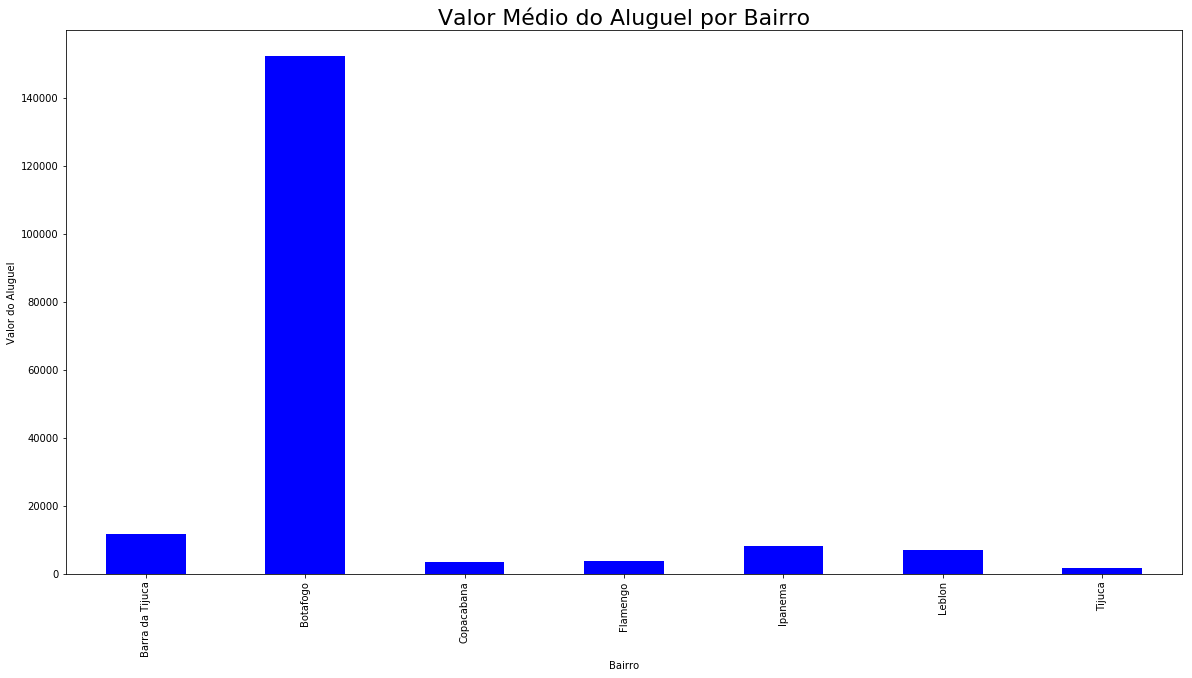

In [76]:
fig = grupo_bairro["Valor"].std().plot.bar(color = "blue")
fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro",{"fontsize":22})